# Мой Pet Project
# Рекомендательная система фильмов


In [11]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [12]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/Ponomarenko6/PetProject/main/movies.csv')
ratings_df = pd.read_csv('https://raw.githubusercontent.com/Ponomarenko6/PetProject/main/ratings.csv')

In [13]:
movies_df.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [14]:
movies_df


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


# Добавим фичу средняя оценка фильма

In [15]:
mean_movie_rating = ratings_df.groupby('movieId')['rating'].mean()
mean_movie_rating

,rating
movieId,
1,3.907328
2,3.353261
3,3.189655
4,2.818182
5,3.250000
...,...
146684,4.000000
146878,2.500000
148238,3.000000


In [16]:
ratings_df = ratings_df.merge(mean_movie_rating, how="left", on="movieId", suffixes=("", "_movie_mean"))
ratings_df

,userId,movieId,rating,timestamp,rating_movie_mean
0,1,16,4.0,1217897793,3.785714
1,1,24,1.5,1217895807,2.894737
2,1,32,4.0,1217896246,3.939614
3,1,47,4.0,1217896556,4.130102
4,1,50,4.0,1217896523,4.328947
...,...,...,...,...,...
105334,668,142488,4.0,1451535844,4.000000
105335,668,142507,3.5,1451535889,3.500000
105336,668,143385,4.0,1446388585,4.500000
105337,668,144976,2.5,1448656898,3.000000


# Аналогично средняя оценка пользователя по всем фильмам

In [17]:
mean_user_rating = ratings_df.groupby('userId')['rating'].mean()
mean_user_rating
ratings_df = ratings_df.merge(mean_user_rating, how='left', on='userId', suffixes=("", "_user_mean"))
ratings_df

,userId,movieId,rating,timestamp,rating_movie_mean,rating_user_mean
0,1,16,4.0,1217897793,3.785714,3.628319
1,1,24,1.5,1217895807,2.894737,3.628319
2,1,32,4.0,1217896246,3.939614,3.628319
3,1,47,4.0,1217896556,4.130102,3.628319
4,1,50,4.0,1217896523,4.328947,3.628319
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,4.000000,2.797200
105335,668,142507,3.5,1451535889,3.500000,2.797200
105336,668,143385,4.0,1446388585,4.500000,2.797200
105337,668,144976,2.5,1448656898,3.000000,2.797200


# Переведем timestamp в отдельные фичи, оставив самые существенные


In [18]:
datetimes = pd.to_datetime(ratings_df['timestamp'], unit='s')

ratings_df['year'] = datetimes.dt.year
ratings_df['month'] = datetimes.dt.month
ratings_df['day'] = datetimes.dt.day
ratings_df['day_of_week'] = datetimes.dt.dayofweek
ratings_df['hour'] = datetimes.dt.hour

In [19]:
ratings_df

,userId,movieId,rating,timestamp,rating_movie_mean,rating_user_mean,year,month,day,day_of_week,hour
0,1,16,4.0,1217897793,3.785714,3.628319,2008,8,5,1,0
1,1,24,1.5,1217895807,2.894737,3.628319,2008,8,5,1,0
2,1,32,4.0,1217896246,3.939614,3.628319,2008,8,5,1,0
3,1,47,4.0,1217896556,4.130102,3.628319,2008,8,5,1,0
4,1,50,4.0,1217896523,4.328947,3.628319,2008,8,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,4.000000,2.797200,2015,12,31,3,4
105335,668,142507,3.5,1451535889,3.500000,2.797200,2015,12,31,3,4
105336,668,143385,4.0,1446388585,4.500000,2.797200,2015,11,1,6,14
105337,668,144976,2.5,1448656898,3.000000,2.797200,2015,11,27,4,20


In [20]:
ratings_df = ratings_df.drop('timestamp', axis = 1)

In [21]:
ratings_df

,userId,movieId,rating,rating_movie_mean,rating_user_mean,year,month,day,day_of_week,hour
0,1,16,4.0,3.785714,3.628319,2008,8,5,1,0
1,1,24,1.5,2.894737,3.628319,2008,8,5,1,0
2,1,32,4.0,3.939614,3.628319,2008,8,5,1,0
3,1,47,4.0,4.130102,3.628319,2008,8,5,1,0
4,1,50,4.0,4.328947,3.628319,2008,8,5,1,0
...,...,...,...,...,...,...,...,...,...,...
105334,668,142488,4.0,4.000000,2.797200,2015,12,31,3,4
105335,668,142507,3.5,3.500000,2.797200,2015,12,31,3,4
105336,668,143385,4.0,4.500000,2.797200,2015,11,1,6,14
105337,668,144976,2.5,3.000000,2.797200,2015,11,27,4,20


# Циклически закодирую часы так, чтобы 0 и 24 находились рядом. В случае One-hot модель будет штрафовать неправильно

In [22]:
def hour_cycle_encoder_x(hour):
  x = np.sin((hour * np.pi) / 12)
  return x

def hour_cycle_encoder_y(hour):
  y = np.cos((hour * np.pi) / 12)
  return y


ratings_df['encoded_hour_x'] = ratings_df['hour'].apply(hour_cycle_encoder_x)
ratings_df['encoded_hour_y'] = ratings_df['hour'].apply(hour_cycle_encoder_y)


In [23]:
ratings_df = ratings_df.drop('hour', axis=1)
ratings_df

,userId,movieId,rating,rating_movie_mean,rating_user_mean,year,month,day,day_of_week,encoded_hour_x,encoded_hour_y
0,1,16,4.0,3.785714,3.628319,2008,8,5,1,0.000000,1.000000
1,1,24,1.5,2.894737,3.628319,2008,8,5,1,0.000000,1.000000
2,1,32,4.0,3.939614,3.628319,2008,8,5,1,0.000000,1.000000
3,1,47,4.0,4.130102,3.628319,2008,8,5,1,0.000000,1.000000
4,1,50,4.0,4.328947,3.628319,2008,8,5,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
105334,668,142488,4.0,4.000000,2.797200,2015,12,31,3,0.866025,0.500000
105335,668,142507,3.5,3.500000,2.797200,2015,12,31,3,0.866025,0.500000
105336,668,143385,4.0,4.500000,2.797200,2015,11,1,6,-0.500000,-0.866025
105337,668,144976,2.5,3.000000,2.797200,2015,11,27,4,-0.866025,0.500000


#Займемся movies_df

In [24]:
genres_list = movies_df['genres'].apply(lambda x: x.split('|'))
genres_list

,genres
0,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,"[Adventure, Children, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
10324,"[Animation, Children, Comedy]"
10325,[Comedy]
10326,[Comedy]
10327,[Drama]


In [25]:
movies_df['genres'] = genres_list

# Закодиурем Жанры с помощью MultiLabelBinarizer



In [26]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(genres_list)
list(mlb.classes_)
mlb.transform(genres_list)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [27]:
genre_encoded = pd.DataFrame(mlb.transform(genres_list),
                             columns=mlb.classes_,
                             index=movies_df.index)
genre_encoded

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10326,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10327,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [28]:
movies_encoded = pd.concat([movies_df.drop("genres", axis=1), genre_encoded], axis=1)
movies_encoded.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df = ratings_df.merge(movies_encoded, how="left", on="movieId")
df

,userId,movieId,rating,rating_movie_mean,rating_user_mean,year,month,day,day_of_week,encoded_hour_x,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,3.785714,3.628319,2008,8,5,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,2.894737,3.628319,2008,8,5,1,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,3.939614,3.628319,2008,8,5,1,0.000000,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,4.130102,3.628319,2008,8,5,1,0.000000,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,4.328947,3.628319,2008,8,5,1,0.000000,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,668,142488,4.0,4.000000,2.797200,2015,12,31,3,0.866025,...,0,0,0,0,0,0,0,1,0,0
105335,668,142507,3.5,3.500000,2.797200,2015,12,31,3,0.866025,...,0,0,0,0,0,0,0,0,0,0
105336,668,143385,4.0,4.500000,2.797200,2015,11,1,6,-0.500000,...,0,0,0,0,0,0,0,1,0,0
105337,668,144976,2.5,3.000000,2.797200,2015,11,27,4,-0.866025,...,0,1,0,0,0,0,0,0,0,1


# Сделаем средний нормированный рейтинг для каждого из жанров

In [30]:
mean_genres_by_users = pd.concat(
    [
        df["userId"],
        df[list(mlb.classes_)].multiply(df['rating'],axis=0)
    ], axis=1
).groupby("userId").mean()
df = df.merge(mean_genres_by_users, how="left", on="userId", suffixes=("", "_mean_gen"))

In [31]:
df

,userId,movieId,rating,rating_movie_mean,rating_user_mean,year,month,day,day_of_week,encoded_hour_x,...,Film-Noir_mean_gen,Horror_mean_gen,IMAX_mean_gen,Musical_mean_gen,Mystery_mean_gen,Romance_mean_gen,Sci-Fi_mean_gen,Thriller_mean_gen,War_mean_gen,Western_mean_gen
0,1,16,4.0,3.785714,3.628319,2008,8,5,1,0.000000,...,0.070796,0.261062,0.137168,0.035398,0.438053,0.473451,0.752212,1.473451,0.371681,0.030973
1,1,24,1.5,2.894737,3.628319,2008,8,5,1,0.000000,...,0.070796,0.261062,0.137168,0.035398,0.438053,0.473451,0.752212,1.473451,0.371681,0.030973
2,1,32,4.0,3.939614,3.628319,2008,8,5,1,0.000000,...,0.070796,0.261062,0.137168,0.035398,0.438053,0.473451,0.752212,1.473451,0.371681,0.030973
3,1,47,4.0,4.130102,3.628319,2008,8,5,1,0.000000,...,0.070796,0.261062,0.137168,0.035398,0.438053,0.473451,0.752212,1.473451,0.371681,0.030973
4,1,50,4.0,4.328947,3.628319,2008,8,5,1,0.000000,...,0.070796,0.261062,0.137168,0.035398,0.438053,0.473451,0.752212,1.473451,0.371681,0.030973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,668,142488,4.0,4.000000,2.797200,2015,12,31,3,0.866025,...,0.106375,0.218475,0.057855,0.118704,0.224287,0.517700,0.202008,0.701391,0.184836,0.091846
105335,668,142507,3.5,3.500000,2.797200,2015,12,31,3,0.866025,...,0.106375,0.218475,0.057855,0.118704,0.224287,0.517700,0.202008,0.701391,0.184836,0.091846
105336,668,143385,4.0,4.500000,2.797200,2015,11,1,6,-0.500000,...,0.106375,0.218475,0.057855,0.118704,0.224287,0.517700,0.202008,0.701391,0.184836,0.091846
105337,668,144976,2.5,3.000000,2.797200,2015,11,27,4,-0.866025,...,0.106375,0.218475,0.057855,0.118704,0.224287,0.517700,0.202008,0.701391,0.184836,0.091846


# Посмотрим на матрицу Корреляции фичей и таргета

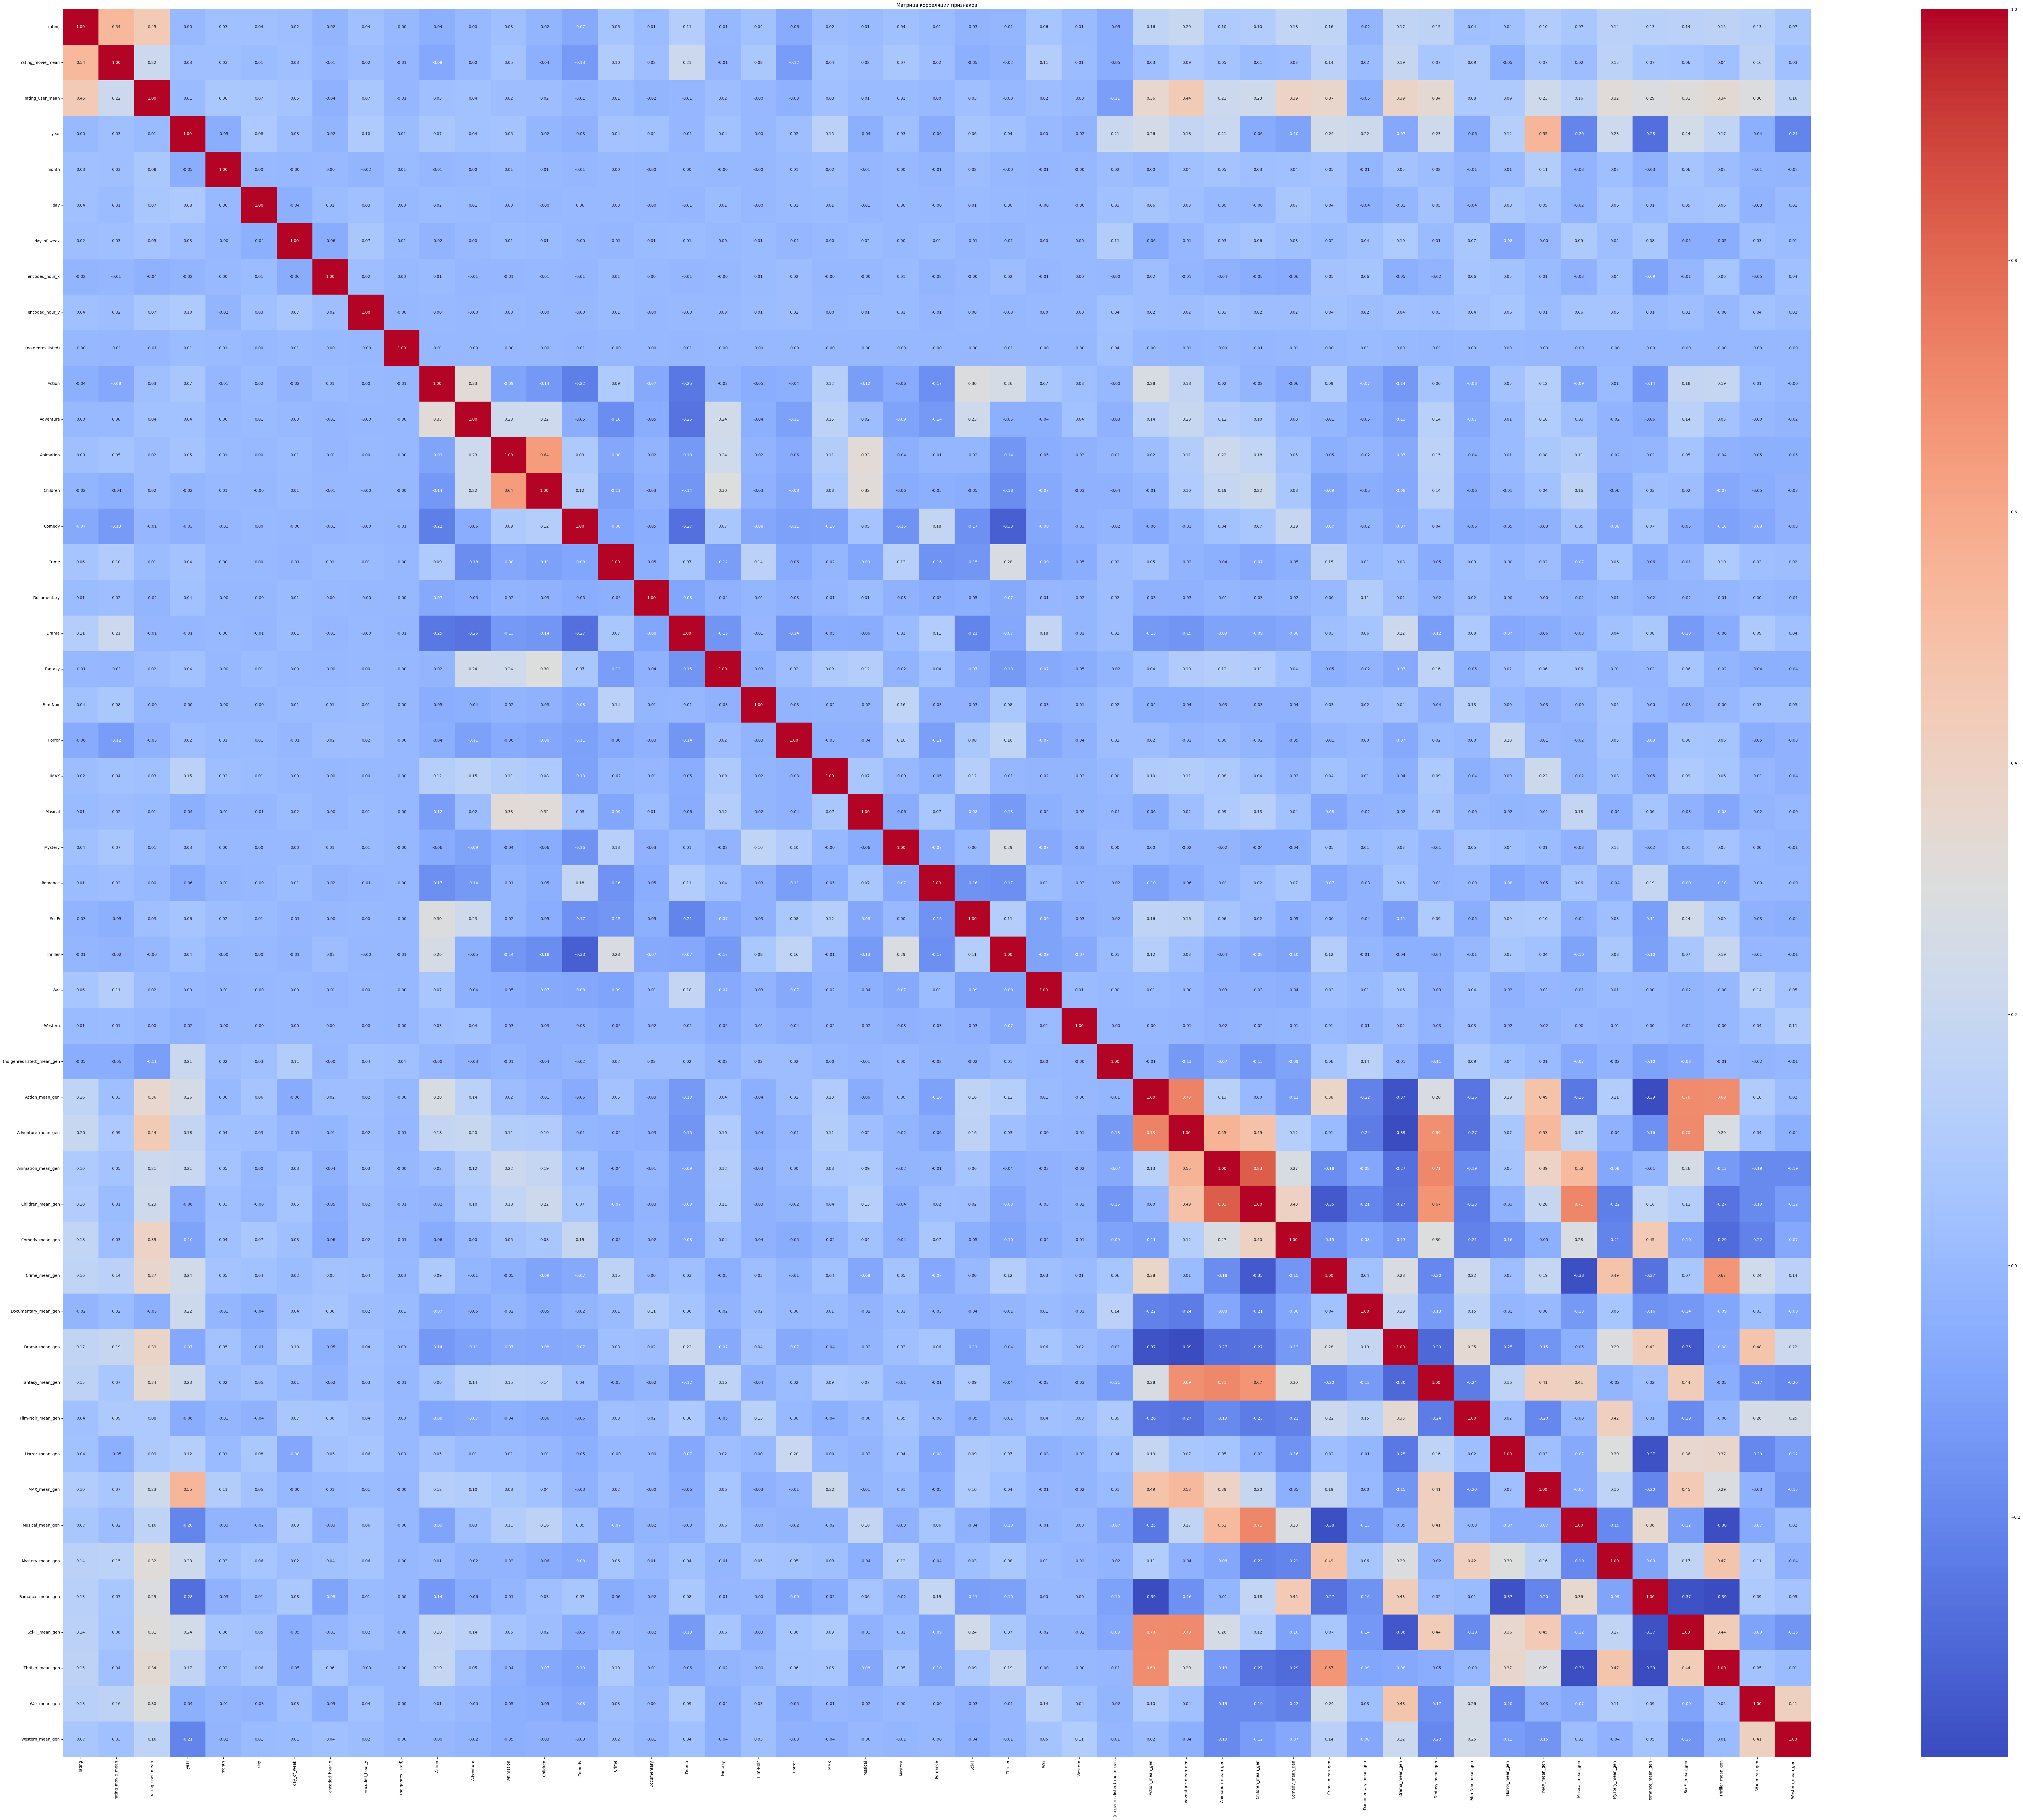

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление матрицы корреляции
df_for_corr =  df.drop(["userId", "movieId", "title"], axis = 1)
correlation_matrix = df_for_corr.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции признаков')
plt.show()

***rating_movie_mean и rating_user_mean имеют наибольшую корреляцию с таргетом, что и следовало ожидать. Остальные фичи слабо коррелируют с таргетом. Стоит задуматься над L1 регуляризацией, либо реализовать dropout чтобы вытащить с этих фичей по максимуму.***

# Начинаем Обучение

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["userId", "movieId", "rating", "title"], axis=1), df["rating"], test_size=0.33, random_state=42)
Xeval, X_test, yeval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pandas as pd

def evaluate_model(predict, y_test):
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, predict),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, predict),
        "Mean Absolute Percentage Error (MAPE)": mean_absolute_percentage_error(y_test, predict) * 100,
        "R-squared (R²)": r2_score(y_test, predict)
    }
    results_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
    print("\nModel Evaluation Metrics:")
    print(results_df.to_string(index=False, float_format="%.4f"))

# Посмотрим на метрики для KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV


knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
pred = knn_regressor.predict(X_test)

evaluate_model(pred, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.7745
            Mean Absolute Error (MAE)  0.6709
Mean Absolute Percentage Error (MAPE) 28.3191
                       R-squared (R²)  0.2927


# Подберем с помощью RandomizedSearchCV гиперпараметр число ближайших соседей на Валидационной выборке.

In [36]:
knn_regressor = KNeighborsRegressor()
param_dist = {
    'n_neighbors': np.arange(1, 21)
}
random_search = RandomizedSearchCV(knn_regressor, param_distributions=param_dist, scoring='r2', random_state=42)
random_search.fit(Xeval, yeval)
random_search.best_params_

{'n_neighbors': 12}

In [37]:
best_knn_model = random_search.best_estimator_
best_knn_model.fit(X_train, y_train)
best_knn_pred = best_knn_model.predict(X_test)
evaluate_model(best_knn_pred, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.7365
            Mean Absolute Error (MAE)  0.6599
Mean Absolute Percentage Error (MAPE) 28.5099
                       R-squared (R²)  0.3274


Заметны улучшения показателей метрик

In [38]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


# Реализуем на Кросс-Валидационной выборке CatBoostRegressor


In [39]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
# Создание и настройка модели CatBoostRegressor
model_catboost = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          verbose=0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_catboost, df.drop(["userId", "movieId", "rating", "title"], axis=1), df['rating'], cv=kf, scoring='r2')
print(f'r2 для Kf: {scores}')
print(f'Средний r2 для Kf: {scores.mean()}')

r2 для Kf: [0.4624486  0.46000104 0.46366313 0.47275093 0.46415334]
Средний r2 для Kf: 0.46460340960155333


# Обучим CatBoostRegressor

In [40]:
# Определение модели
model_catboost_2 = CatBoostRegressor(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                           verbose=0)

model_catboost_2.fit(X_train, y_train)
pred_catboost = model_catboost_2.predict(X_test)
evaluate_model(pred_catboost, y_test)



Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.5843
            Mean Absolute Error (MAE)  0.5837
Mean Absolute Percentage Error (MAPE) 24.3115
                       R-squared (R²)  0.4664


Видно улучшение метрик в сравнении с KNN

# Попробуем Линейную регрессию с L1 регуляризатором


In [42]:
from sklearn.linear_model import Lasso

param_dist = {
    'alpha': np.logspace(-4, 0, 50)  # Значения alpha от 0.0001 до 1
}

lasso = Lasso()

# Настройка RandomizedSearchCV
random_search_lasso = RandomizedSearchCV(lasso, param_distributions=param_dist,
                                   n_iter=20,
                                   scoring='r2',
                                   cv=5,
                                   verbose=0,
                                   random_state=42)

# Обучение модели с использованием Randomized Search
random_search_lasso.fit(X_train, y_train)

# Лучшая модель
best_model_lasso = random_search_lasso.best_estimator_

# Прогнозирование на тестовой выборке
y_pred = best_model_lasso.predict(X_test)
random_search_lasso.best_params_


{'alpha': 0.00017575106248547912}

In [43]:
evaluate_model(y_pred, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.6372
            Mean Absolute Error (MAE)  0.6138
Mean Absolute Percentage Error (MAPE) 26.2447
                       R-squared (R²)  0.4181


L1 регуляризация мало влияет, Метрики хуже чем у CatBoost

# В заключение, попробуем настроить Параметр bagging_temperature для CatboostRegression, тем самым повлияв на выбор с помощью Bagging подвыборки для очередного дерева решений. Ожидаем взять по максимуму от фичей с маленькой корреляцией с таргетом.

In [44]:
# Определение модели

model_catboost__bag = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          bagging_temperature=3,
                          verbose=0)

model_catboost__bag.fit(X_train, y_train)
pred_catboost_bag = model_catboost__bag.predict(X_test)
evaluate_model(pred_catboost_bag, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.5843
            Mean Absolute Error (MAE)  0.5837
Mean Absolute Percentage Error (MAPE) 24.3115
                       R-squared (R²)  0.4664


# Удалось добиться наилучших метрик для данной модели